In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

import matplotlib
from pcygni_profile import PcygniCalculator
import astropy.units as units
import astropy.constants as csts
from scipy.interpolate import interp1d
import lmfit
import time
import pickle
import corner

#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)
        
        
import math
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23

from scipy.integrate import quad
def integral(x): 
    return np.sqrt(1-v**2) * 1/(1-v*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 

#n_days = np.array([126000, 212400, 298800, 385200])/86400
#n_days = np.array([1.43, 2.42, 3.41, 4.4])
#n_days = np.array([1.43, 2.42, 3.45, 4.4, 5.4])

#beta, doppler = np.loadtxt('doppler_wo_prolate.txt')
#inter = interp1d(beta, doppler)
beta, doppler = np.loadtxt('doppler_wo_prolate_inv.txt')
inter = interp1d(beta, doppler)

def lum_dist_arr(N, vphot, n_days=1.43, dt=0.): #propagate bb to luminosity distance 
    delta = inter(vphot) #1-2/3*11/10*vphot
    corr = delta**4
        
    theta = 2*np.sqrt( N*10**(7) / corr )#**5)/np.pi ) #inverse
    v = vphot*c 
    t = (n_days-dt) * (3600*24)
    r = v*t
    
    D = r/theta*2# factor of 2 
    D_mpc = D*(3.2408e-23) 
    return D_mpc



In [4]:
import numpy as np
n_days = np.array([126000, 212400, 298800, 385200,5.458*86400])/86400

#### Datasets: 

###### OB1: 
"./data/OB2/OB1_fixed_ve_dl_40_large.pkl" - fixed ve = 0.057 single P-cygni

###### OB2: 
"./data/OB2/OB2_3_peaks_fixed_ve.pkl" - fixed ve = 0.11

###### OB3: 
"./data/OB3/OB3_3_peaks_large.pkl" - hits ceiling of ve=1

###### OB4: 
"./Data/OB4/OB4_3_peaks.pkl" - free ve (huge uncertainties, may need longer chain)

In [5]:
np.shape(emcee_flatten)

NameError: name 'emcee_flatten' is not defined

Lum_dist =  44.204252241918844 + 0.11249252747873584 - 0.023438090332774664
<Parameter 've', value=0.26456568130047664 +/- 0.036, bounds=[0:1]>
1.3228480356123556e-29
Lum_dist =  44.14879156583602 + 0.1701700586162005 - 0.16507366700255943
<Parameter 've', value=0.8555069234488403 +/- 0.152, bounds=[0:1]>
2.644827753990633e-29
Lum_dist =  39.660142152558755 + 0.11274680497579936 - 0.7013547767180199
<Parameter 've', value=5.389885767913711 +/- 3.38, bounds=[0:10]>
3.65544074040465e-29
Lum_dist =  46.911686244594016 + 0.2662043662150495 - 0.2739458362228717
<Parameter 've', value=0.9583911740168418 +/- 0.0484, bounds=[0:1]>
3.128645232845264e-29
Lum_dist =  43.555289443323524 + 0.08971406390836023 - 0.5108284690474818
<Parameter 've', value=0.312461843260899 +/- 0.0308, bounds=[0:1]>
3.555489174364442e-29


(36.0, 50.0)

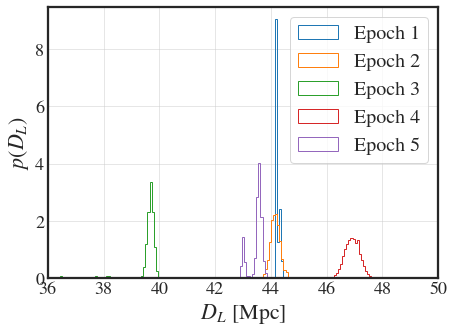

In [9]:
#files = ["./data/OB1_init_no_gaussian_low_v.pkl", "./data/OB2_init_no_gaussian_low_v.pkl", 
#        "./data/OB3_init_no_gaussian_high_v.pkl", "./Data/OB4/OB4_3.pkl"] #'OB4_pick.pkl'
#n_days = [1.43, 2.42, 3.65, 4., 5.40]
n_days = [1.432, 2.42, 3.41, 4.40, 5.40]

files = ["./data/OB1/OB1_3_peaks_XL_3.pkl", "./data/OB2/OB2_3_peaks_XL_2.pkl", 
         "./data/OB3/OB3_3_peaks_XL_4.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl", 
         "./Data/OB5/OB5_3_peaks_XL_3.pkl" ] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
plt.figure(figsize=(7,5))
    
steady = [100000, 1000, 100000, 1000, 0, 100000]

d_m, ds_1, ds_2 = [], [], []
multi = np.ones(5) 
#[1.016, 1.012, 1.008, 1, 1, 1]
#multi = [np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi)]

pdf_list = []
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    #print(emcee_res.params['T'])
    #print(emcee_res.params['vphot'])
    
    vphot = np.array(emcee_flatten['vphot'])
        
    dl = lum_dist_arr(np.array(emcee_flatten['N']), vphot, n_days=n_days[idx])[steady[idx]:]*multi[idx]
                      #emcee_res.params['t0'].value/86400)#n_days[idx])
    
    h = plt.hist(dl, bins=200, histtype='step', density=True, label='Epoch '+str(idx+1), range=(35,50))
    pdf_list.append(h[0])
    #plt.hist(dl, bins=100, histtype='stepfilled', density=True, alpha=0.2)
    #, range=(35,50));
    d1, d_l, d_h = np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)
    d_m.append(d1); ds_1.append(d1-d_l), ds_2.append(d_h-d1)
    print('Lum_dist = ', d1, '+', d_h-d1, '-', d1-d_l)
    print(emcee_res.params['ve'])
    print(np.median(emcee_flatten['N']))

d_m = np.array(d_m); ds_1 = np.array(ds_1); ds_2 = np.array(ds_2)
    
plt.legend(frameon=True, fontsize=20)
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 
#plt.xlim(35, 47)
plt.xlim(36, 50)

#plt.savefig('Pictures/dl_dist_4.png', dpi=300)

In [ ]:
print(emcee_res.params['N'])


In [116]:
np.median(np.array(emcee_flatten['N']))

3.555489174364442e-29

H0 =  65.51549611443465 + 0.034756220445757435 - 0.1663029129347393
H0 =  65.50618107490742 + 0.24584882856517254 - 0.25152192796615225
H0 =  72.92002947002588 + 1.3127413466820883 - 0.2067111682599858


C:\Users\asnep\Anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


H0 =  61.648151368322836 + 0.3621156220331656 - 0.34785376901895404
H0 =  66.398794991668 + 0.7879851210696245 - 0.1364853994413977


(Text(0, 0.5, 'p($H_0$)'), Text(0.5, 0, '$H_0$'))

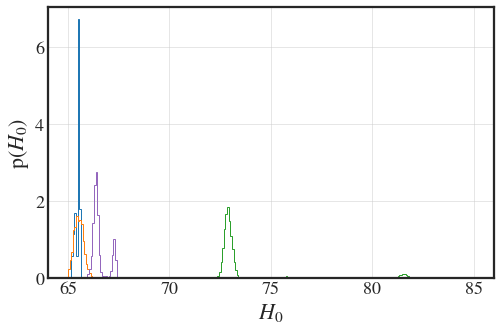

In [142]:
plt.figure(figsize=(8,5))

h_m, h_1, h_2 = [], [], []
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    vphot = np.array(emcee_flatten['vphot'])
    dl = lum_dist_arr(np.array(emcee_flatten['N']), vphot, n_days=n_days[idx])[steady[idx]:]*multi[idx]
    
    H0 = 0.00957*c*1e-3/dl * (1+1.53/2*0.00957) #0.00980*c*1e-3/dl
    
    plt.hist(H0, bins=250, range=(65,85), histtype='step', label='Epoch '+str(idx), density=True)
    d1, d_l, d_h = np.median(H0), np.percentile(H0,15.9), np.percentile(H0,100-15.9)
    h_m.append(d1); h_1.append(d1-d_l), h_2.append(d_h-d1)
    print('H0 = ', d1, '+', d_h-d1, '-', d1-d_l)
    
    
plt.ylabel('p($H_0$)'), plt.xlabel(r'$H_0$')


#plt.savefig('Pictures/H0_dist.png', dpi=300)

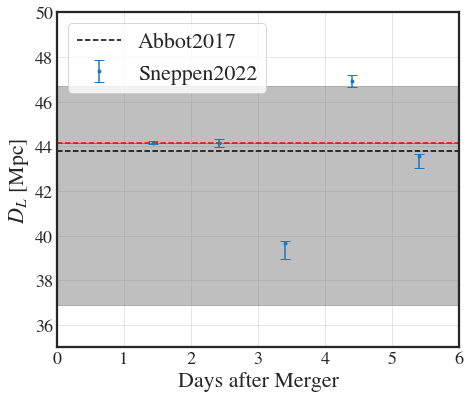

In [253]:
plt.figure(figsize=(7,6))
plt.errorbar([1.43, 2.42, 3.41, 4.4, 5.4], d_m, yerr = [ds_1,ds_2], 
             fmt='.', capsize=5, label='Sneppen2022')

plt.axhline(43.8, ls='--', color='k', label='Abbot2017')
plt.fill_between(np.arange(0,7), (36.9)*np.ones(7), (46.7)*np.ones(7), 
                 color='grey', alpha = 0.5)
dd = ds_2+ds_1#[d1high-d1low,d2high-d2low,d3high-d3low,d4high-d4low]
d_weight = np.sum( d_m[:2]*1/np.array(dd[:2])**2/np.sum(1/np.array(dd[:2])**2) )
d_unc = np.std(d_m[:2])/np.sqrt(2)
plt.axhline(d_weight, ls='--', color='red')
plt.fill_between(np.arange(0,10), (d_weight-d_unc)*np.ones(10), (d_weight+d_unc)*np.ones(10), 
                 color='red', alpha = 0.5)

plt.ylim(35,50), plt.xlim(0,6), plt.legend(frameon=True)
plt.xlabel('Days after Merger'), plt.ylabel(r'$D_L$ [Mpc]')
plt.tight_layout()

#plt.savefig('Pictures/Inferred_Sneppen_4.png', dpi=300)

In [8]:
#Muharjakee
d_best = 36.83
ddbest = 0.17

H0 = 0.00957*3e8*(10**(-3))/d_best * (1+1.53/2*0.00957)
dH0 = ((0.00957*c*(10**(-3))/d_best**2*ddbest)**2 + (0.000433*c*(10**(-3))/d_best)**2 )**(1/2)
H0, dH0 

(78.52345192913386, 3.545322056700937)

In [34]:
(0.000433**2+0.00018**2)**(1/2)

0.00046892323465573765

In [136]:
360/299792.458, (130)/299792.458

(0.0012008307427133474, 0.00043363332375759766)

In [37]:
(2924+307-360)/299792.458, 130/299792.458

(0.009576625173138946, 0.00043363332375759766)

In [256]:
#Muharjakee
d_best = 44.20
ddbest = 0.17

H0 = 0.00957*3e8*(10**(-3))/d_best * (1+1.53/2*0.00957)
dH0 = ((0.00957*c*(10**(-3))/d_best**2*ddbest)**2 + (0.000433*c*(10**(-3))/d_best)**2 )**(1/2)
H0, dH0 

(65.43028811199095, 2.949513294122874)

In [9]:
H0_p, dH0_p = 67.36, 0.54
(H0_p-H0)/np.sqrt(dH0_p**2+dH0**2) 

-3.1128821751935787

In [10]:
H0_s, dH0_s = 73.03, 1.04
(H0_s-H0)/np.sqrt(dH0_s**2+dH0**2) 

-1.4868410772933434

In [162]:
(H0_p/H0)**(-1), (dH0_p**2+dH0**2)**(1/2)/H0

(0.9726726282782758, 0.04582639374747384)

In [161]:
(H0_s/H0)**(-1), (dH0_s**2+dH0**2)**(1/2)/H0

(0.897154980704158, 0.04779214112430233)

In [34]:
#Hjorth
d_best = 38.1
ddbest = 0.1

H0 = 0.0098*3e8*(10**(-3))/d_best * (1+1.53/2*0.0111)
dH0 = ((0.0098*c*(10**(-3))/d_best**2*ddbest)**2 + (0.00079*c*(10**(-3))/d_best)**2 )**(1/2)
H0, dH0 

(77.82060393700787, 6.22376873797102)

In [37]:
#Abbot
d_best = 38.1
ddbest = 0.1

H0 = 0.01006*3e8*(10**(-3))/d_best
dH0 = ((0.01006*c*(10**(-3))/d_best**2*ddbest)**2 + (0.00055*c*(10**(-3))/d_best)**2 )**(1/2)
H0, dH0


(79.21259842519684, 4.335696352954241)

In [184]:
np.array([3327-310,150])/299792458

array([1.00636288e-05, 5.00346143e-07])

(0.0, 6.0)

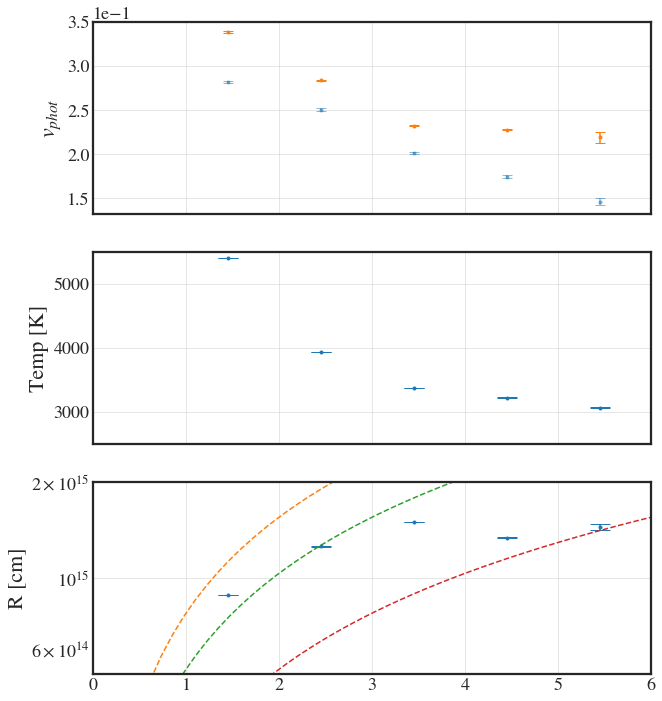

In [89]:
files = ["./data/OB1/OB1_3_peaks_XL_2.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl",# "./Data/OB4/OB4_3_peaks_XL_2.pkl", 
        "./Data/OB5/OB5_3_peaks_XL.pkl"] 
v_phot = []; dv_phot = []; v_max = []; dv_max = []
temp = []; dtemp = []; N = []; dN = []

n_days = [1.45, 2.45, 3.45, 4.45, 5.45]
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    v_phot.append(emcee_res.params['vphot'].value )
    dv_phot.append(emcee_res.params['vphot'].stderr)
    v_max.append(emcee_res.params['vmax'].value )
    dv_max.append(emcee_res.params['vmax'].stderr)
    
    temp.append(emcee_res.params['T'].value )
    dtemp.append(emcee_res.params['T'].stderr)
    N.append(emcee_res.params['N'].value )
    dN.append(emcee_res.params['N'].stderr)
    
fig,ax = plt.subplots(nrows=3, figsize=(10,12), sharex=True)
ax[0].errorbar(n_days, v_phot, yerr=2*np.array(dv_phot), fmt='.', capsize=5, alpha=0.5), ax[0].set_ylabel(r'$v_{phot}$')
ax[0].errorbar(n_days, v_max, yerr =2*np.array(dv_max) , fmt='.', capsize=5)

ax[1].errorbar(n_days, temp, yerr=dtemp, fmt='.', capsize=10), ax[1].set_ylabel('Temp [K]')
ax[1].ticklabel_format(axis='y', style='plain'), ax[1].set_ylim(2500,5500)

v_phot = np.array(v_phot)

from astropy.cosmology import Planck15 as cosmo
import astropy.units as u
dl = cosmo.luminosity_distance(0.009783).to(u.cm).value
R = np.sqrt( np.array(N)*10**7 / (np.pi) ) *dl
dR = np.sqrt( 10**7 / (np.array(N)*np.pi) ) *dl*np.array(dN)

ax[2].errorbar(n_days, R, yerr=dR, fmt='.', capsize=10), ax[2].set_ylabel('R [cm]')
ax[2].set_yscale('log'), ax[2].set_ylim(0.5e15, 2e15) #, ax[1].set_xscale('log')
ax[2].plot( np.linspace(0, 6), np.linspace(0, 6*86400)*3e10*0.3, ls='--' )
ax[2].plot( np.linspace(0, 6), np.linspace(0, 6*86400)*3e10*0.20, ls='--' )
ax[2].plot( np.linspace(0, 6), np.linspace(0, 6*86400)*3e10*0.1, ls='--' )

plt.xlim(0, 6)

In [136]:
0.1/40*100

0.25

In [147]:
temp*((1-v_phot**2)**(-1/2)*(1-v_phot))

array([4048.36389423, 3045.49366911, 2753.95957488, 2706.35212319,
       2650.76569854])

In [148]:
temp, temp*inter(v_phot) #(1-v_phot)

([5413.398183023313,
  3935.3655896397554,
  3378.65928652403,
  3227.846574474768,
  3071.41064255841],
 array([4293.53695486, 3211.83127983, 2877.96500436, 2813.28649161,
        2739.92129726]))

((0.0, 6.0), Text(0.5, 0, 'Time from merger [days]'))

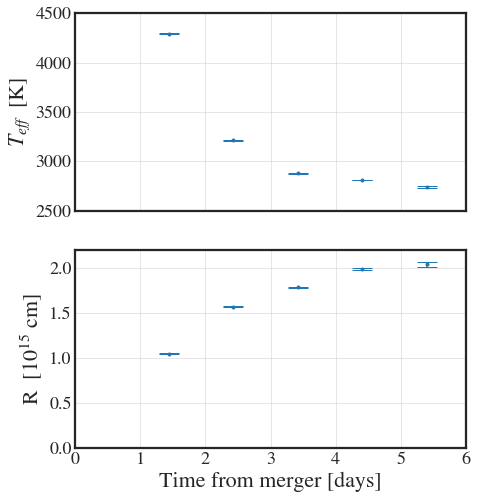

In [177]:
fig,ax = plt.subplots(nrows=2, figsize=(7,8), sharex=True)
#ax[0].errorbar(n_days, v_phot, yerr=2*np.array(dv_phot), fmt='.', capsize=5, alpha=0.5), ax[0].set_ylabel(r'$v_{phot}$')
#ax[0].errorbar(n_days, v_max, yerr =2*np.array(dv_max) , fmt='.', capsize=5)

#ax[0].errorbar(n_days, temp, yerr=dtemp, fmt='.', capsize=10), ax[0].set_ylabel(r'$T_{obs}$ [K]')
#ax[0].errorbar(n_days, temp*(1-v_phot), yerr=dtemp*(1-v_phot), fmt='.', capsize=10)
ax[0].errorbar(n_days, temp*inter(v_phot), yerr=dtemp*inter(v_phot), fmt='.', capsize=10)
ax[0].set_ylabel(r'$T_{eff}$  [K]')
ax[0].ticklabel_format(axis='y', style='plain'), ax[0].set_ylim(2500,4500)

v_phot = np.array(v_phot)
r_phot = v_phot*c*(np.array(n_days)*3600*24*100)
dr_phot = np.array(dv_phot)*c*(np.array(n_days)*3600*24*100)

ax[1].errorbar(n_days, r_phot/1e15, yerr=dr_phot/1e15, fmt='.', capsize=10), #ax[1].set_ylabel('Temp [K]')
#ax[1].set_yscale('log'), 
ax[1].set_ylim(0, 2.2) #, ax[1].set_xscale('log')
#ax[1].errorbar(n_days, R, yerr=dR, fmt='.', capsize=10), 
ax[1].set_ylabel(r'R  [$10^{15}$ cm]')

#ax[1].plot( np.linspace(0, 6), np.linspace(0, 6*86400)*3e10*0.3/1e15, ls='--' )
#ax[1].plot( np.linspace(0, 6), np.linspace(0, 6*86400)*3e10*0.2/1e15, ls='--' )
#ax[1].plot( np.linspace(0, 6), np.linspace(0, 6*86400)*3e10*0.1/1e15, ls='--' )

plt.xlim(0,6), plt.xlabel('Time from merger [days]')
#plt.savefig('Temp_radius.png', dpi=300)

array([1.06232688e+13, 1.59312333e+13, 1.80312645e+13, 2.01173848e+13,
       2.06573856e+13])

In [98]:
n_days

[1.45, 2.45, 3.45, 4.45, 5.45]

In [275]:
v_phot

array([0.28265402, 0.25086976, 0.20163787, 0.17441206, 0.14623248])

In [249]:
N_2 = np.copy(N)
N_2[2] = 3.2e-29
N_2[3] = 3.6e-29
N_2/N, N_2, N

(array([1.        , 1.        , 0.81696742, 1.15065779, 1.        ]),
 array([1.36689928e-29, 2.74934583e-29, 3.20000000e-29, 3.60000000e-29,
        3.64340637e-29]),
 [1.3668992808257217e-29,
  2.749345830137273e-29,
  3.9169248650013465e-29,
  3.128645232845264e-29,
  3.6434063723085333e-29])

In [238]:
for idx,day in enumerate(n_days): 
    #print( lum_dist_arr(N[idx], v_phot[idx], n_days=day) )
    print( lum_dist_arr(N_2[idx], v_phot[idx], n_days=day) )

39.374087387295134
39.964980766197144
39.877523685699586
40.63915643167434
40.34971250255255


Lum_dist =  47.118561468914564 + 0.2216025389865024 - 0.3345367308996714
Lum_dist =  46.91233325093216 + 3.9362233995265754 - 0.7784305465631931
Lum_dist =  39.278267600837275 + 0.8163870705975853 - 0.9472192717086614
Lum_dist =  37.079049324534985 + 0.17055167062147802 - 1.4451993181101912


(Text(0.5, 0, '$D_L$ [Mpc]'), Text(0, 0.5, '$p(D_L)$'))

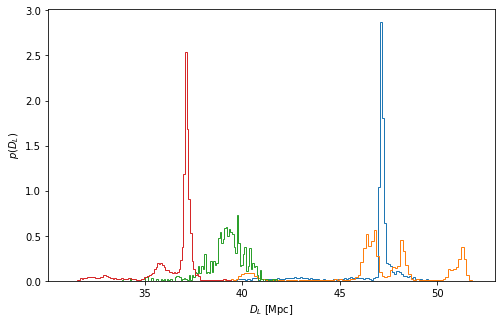

In [12]:
#files = ["./data/OB1_init_no_gaussian_low_v.pkl", "./data/OB2_init_no_gaussian_low_v.pkl", 
#        "./data/OB3_init_no_gaussian_high_v.pkl", "./Data/OB4/OB4_3.pkl"] #'OB4_pick.pkl'

files = ["./data/s_init_no_gaussian_high_v.pkl", "./data/OB2/OB2_3.pkl", 
        "./data/OB3/OB3_emcee.pkl", "./Data/OB4/OB4_3.pkl"] 

plt.figure(figsize=(8,5))
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    vphot = np.array(emcee_flatten['vphot'])
    dl = lum_dist_arr(np.array(emcee_flatten['N']), vphot, n_days=n_days[idx])
                      #emcee_res.params['t0'].value/86400)#n_days[idx])
    
    plt.hist(dl, bins=100, histtype='step', density=True, label='Epoch ')#, range=(35,50));
    d1, d_l, d_h = np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)
    print('Lum_dist = ', d1, '+', d_h-d1, '-', d1-d_l)
    
    
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 

In [9]:
OB = 'OB1'
#OB1_init_no_gaussian_low_v.pkl
#OB2_init_no_gaussian_low_v.pkl
#"./data/OB3_init_no_gaussian_high_v.pkl", OB3_emcee.pkl

pickle_in = open("./data/OB2_init_no_gaussian_low_v.pkl","rb")
emcee_res = pickle.load(pickle_in)
emcee_flatten = emcee_res.flatchain

50.75829118045746 48.910845429241725 50.879418292534076


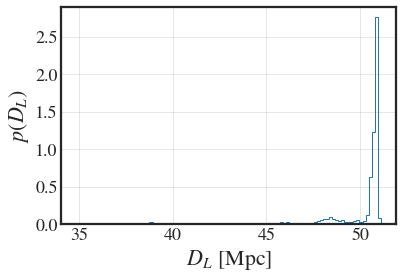

In [10]:
reset_plt(18,22)
vphot = np.array(emcee_flatten['vphot'])
dl = lum_dist_arr(np.array(emcee_flatten['N']), vphot, n_days=2.42) #
#dl = dl[dl>39]
plt.hist(dl, bins=100, histtype='step', density=True);
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 

print(np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)) 

(Text(0.5, 0, '$N$'), Text(0, 0.5, '$p(N)$'))

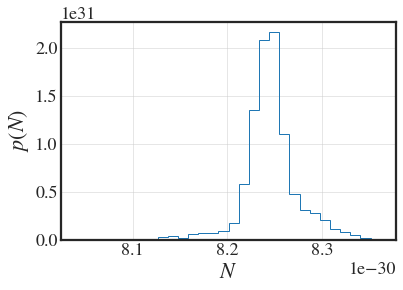

In [11]:
plt.hist(emcee_flatten['N'], bins=30, histtype='step', density=True);
plt.xlabel(r'$N$'), plt.ylabel(r'$p(N)$')

C:\Users\asnep\Anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(Text(0.5, 0, '$v_e$'), Text(0, 0.5, '$p(v_e)$'))

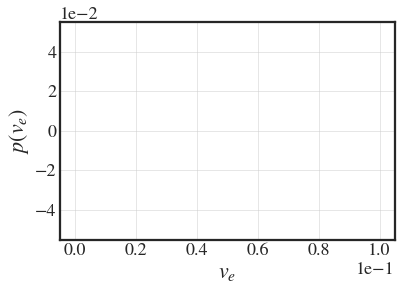

In [12]:
plt.hist(emcee_flatten['ve'], bins=30, histtype='step', density=True, range=(0,0.1));
plt.xlabel(r'$v_e$'), plt.ylabel(r'$p(v_e)$')

In [13]:
emcee_flatten['ve']

0        0.445790
1        0.454133
2        0.422086
3        0.445150
4        0.448434
           ...   
57995    0.715170
57996    0.787073
57997    0.737069
57998    0.906467
57999    0.707515
Name: ve, Length: 58000, dtype: float64

(Text(0.5, 0, '$v_{phot}$ [c]'), Text(0, 0.5, '$p(v_{phot})$'))

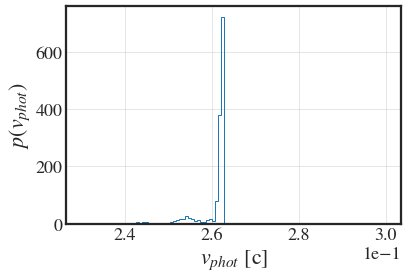

In [14]:
plt.hist(emcee_flatten['vphot'], bins=100, histtype='step', density=True, range=(0.23, 0.3));
plt.xlabel(r'$v_{phot}$ [c]'), plt.ylabel(r'$p(v_{phot})$')

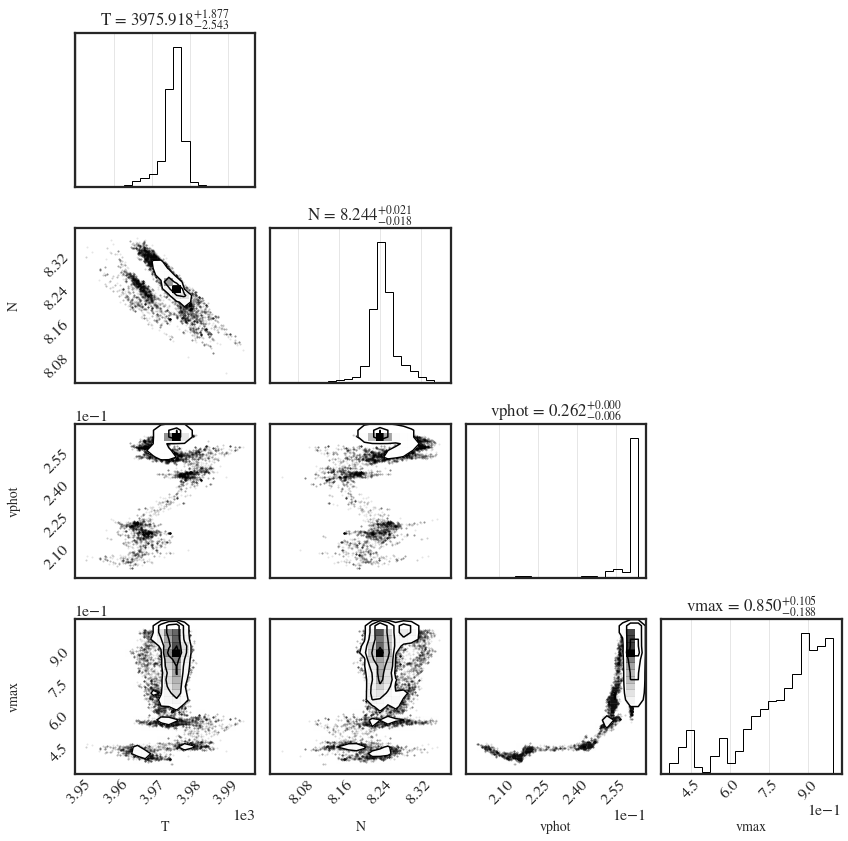

In [17]:
fig,ax = plt.subplots(figsize=(12,12),nrows=4,ncols=4)
#ax = ax.flatten()
reset_plt(16, 14)
corner.corner( np.array([emcee_res.flatchain['T'], emcee_res.flatchain['N']*1e30, emcee_res.flatchain['vphot'],emcee_flatten['ve']]).T, 
                           labels=emcee_res.var_names[:4], show_titles=True, fig=fig, title_fmt = '.3f'); 
plt.tight_layout() 
#ax[2].set_xlim(0.286,0.292)
#ax[2][2].set_xlim(0.286,0.293)
#plt.xlabel('')
#put_ticks(fig,ax)

(None, None, None)

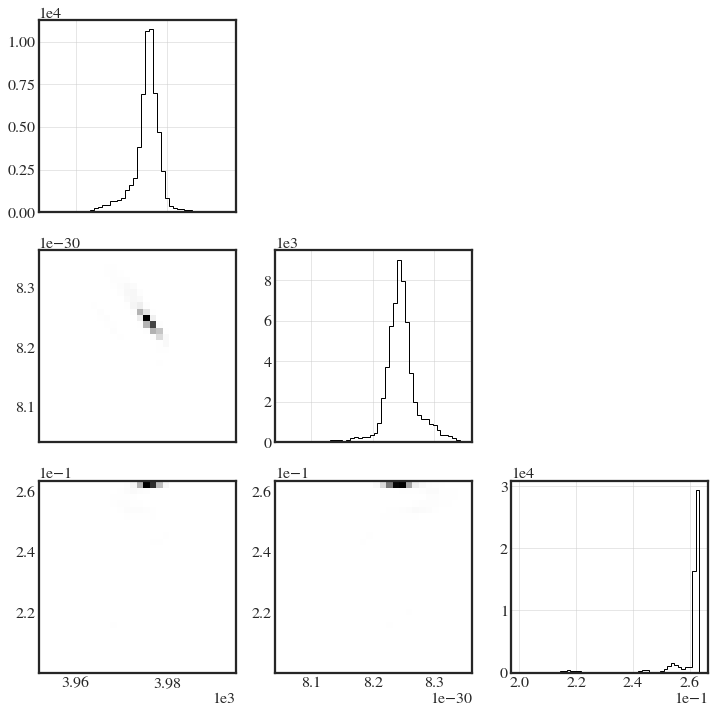

In [16]:
fig,ax = plt.subplots(figsize=(12,12),nrows=3,ncols=3, sharex='col')
ax[0,0].hist(emcee_res.flatchain['T']    , bins=50, histtype='step', color='k'); 
ax[1,1].hist(emcee_res.flatchain['N']    , bins=50, histtype='step', color='k'); 
ax[2,2].hist(emcee_res.flatchain['vphot'], bins=50, histtype='step', color='k'); 

ax[1,0].hist2d(emcee_res.flatchain['T'],emcee_res.flatchain['N'], bins=30); 
ax[2,0].hist2d(emcee_res.flatchain['T'],emcee_res.flatchain['vphot'], bins=30); 
ax[2,1].hist2d(emcee_res.flatchain['N'],emcee_res.flatchain['vphot'], bins=30); 

fig.delaxes(ax[0,1]), fig.delaxes(ax[0,2]), fig.delaxes(ax[1,2])

In [64]:
os.cpu_count()

4

In [72]:
list(res.params.valuesdict().values())

NameError: name 'res' is not defined

ValueError: Provided figure has 169 axes, but data has dimensions K=15

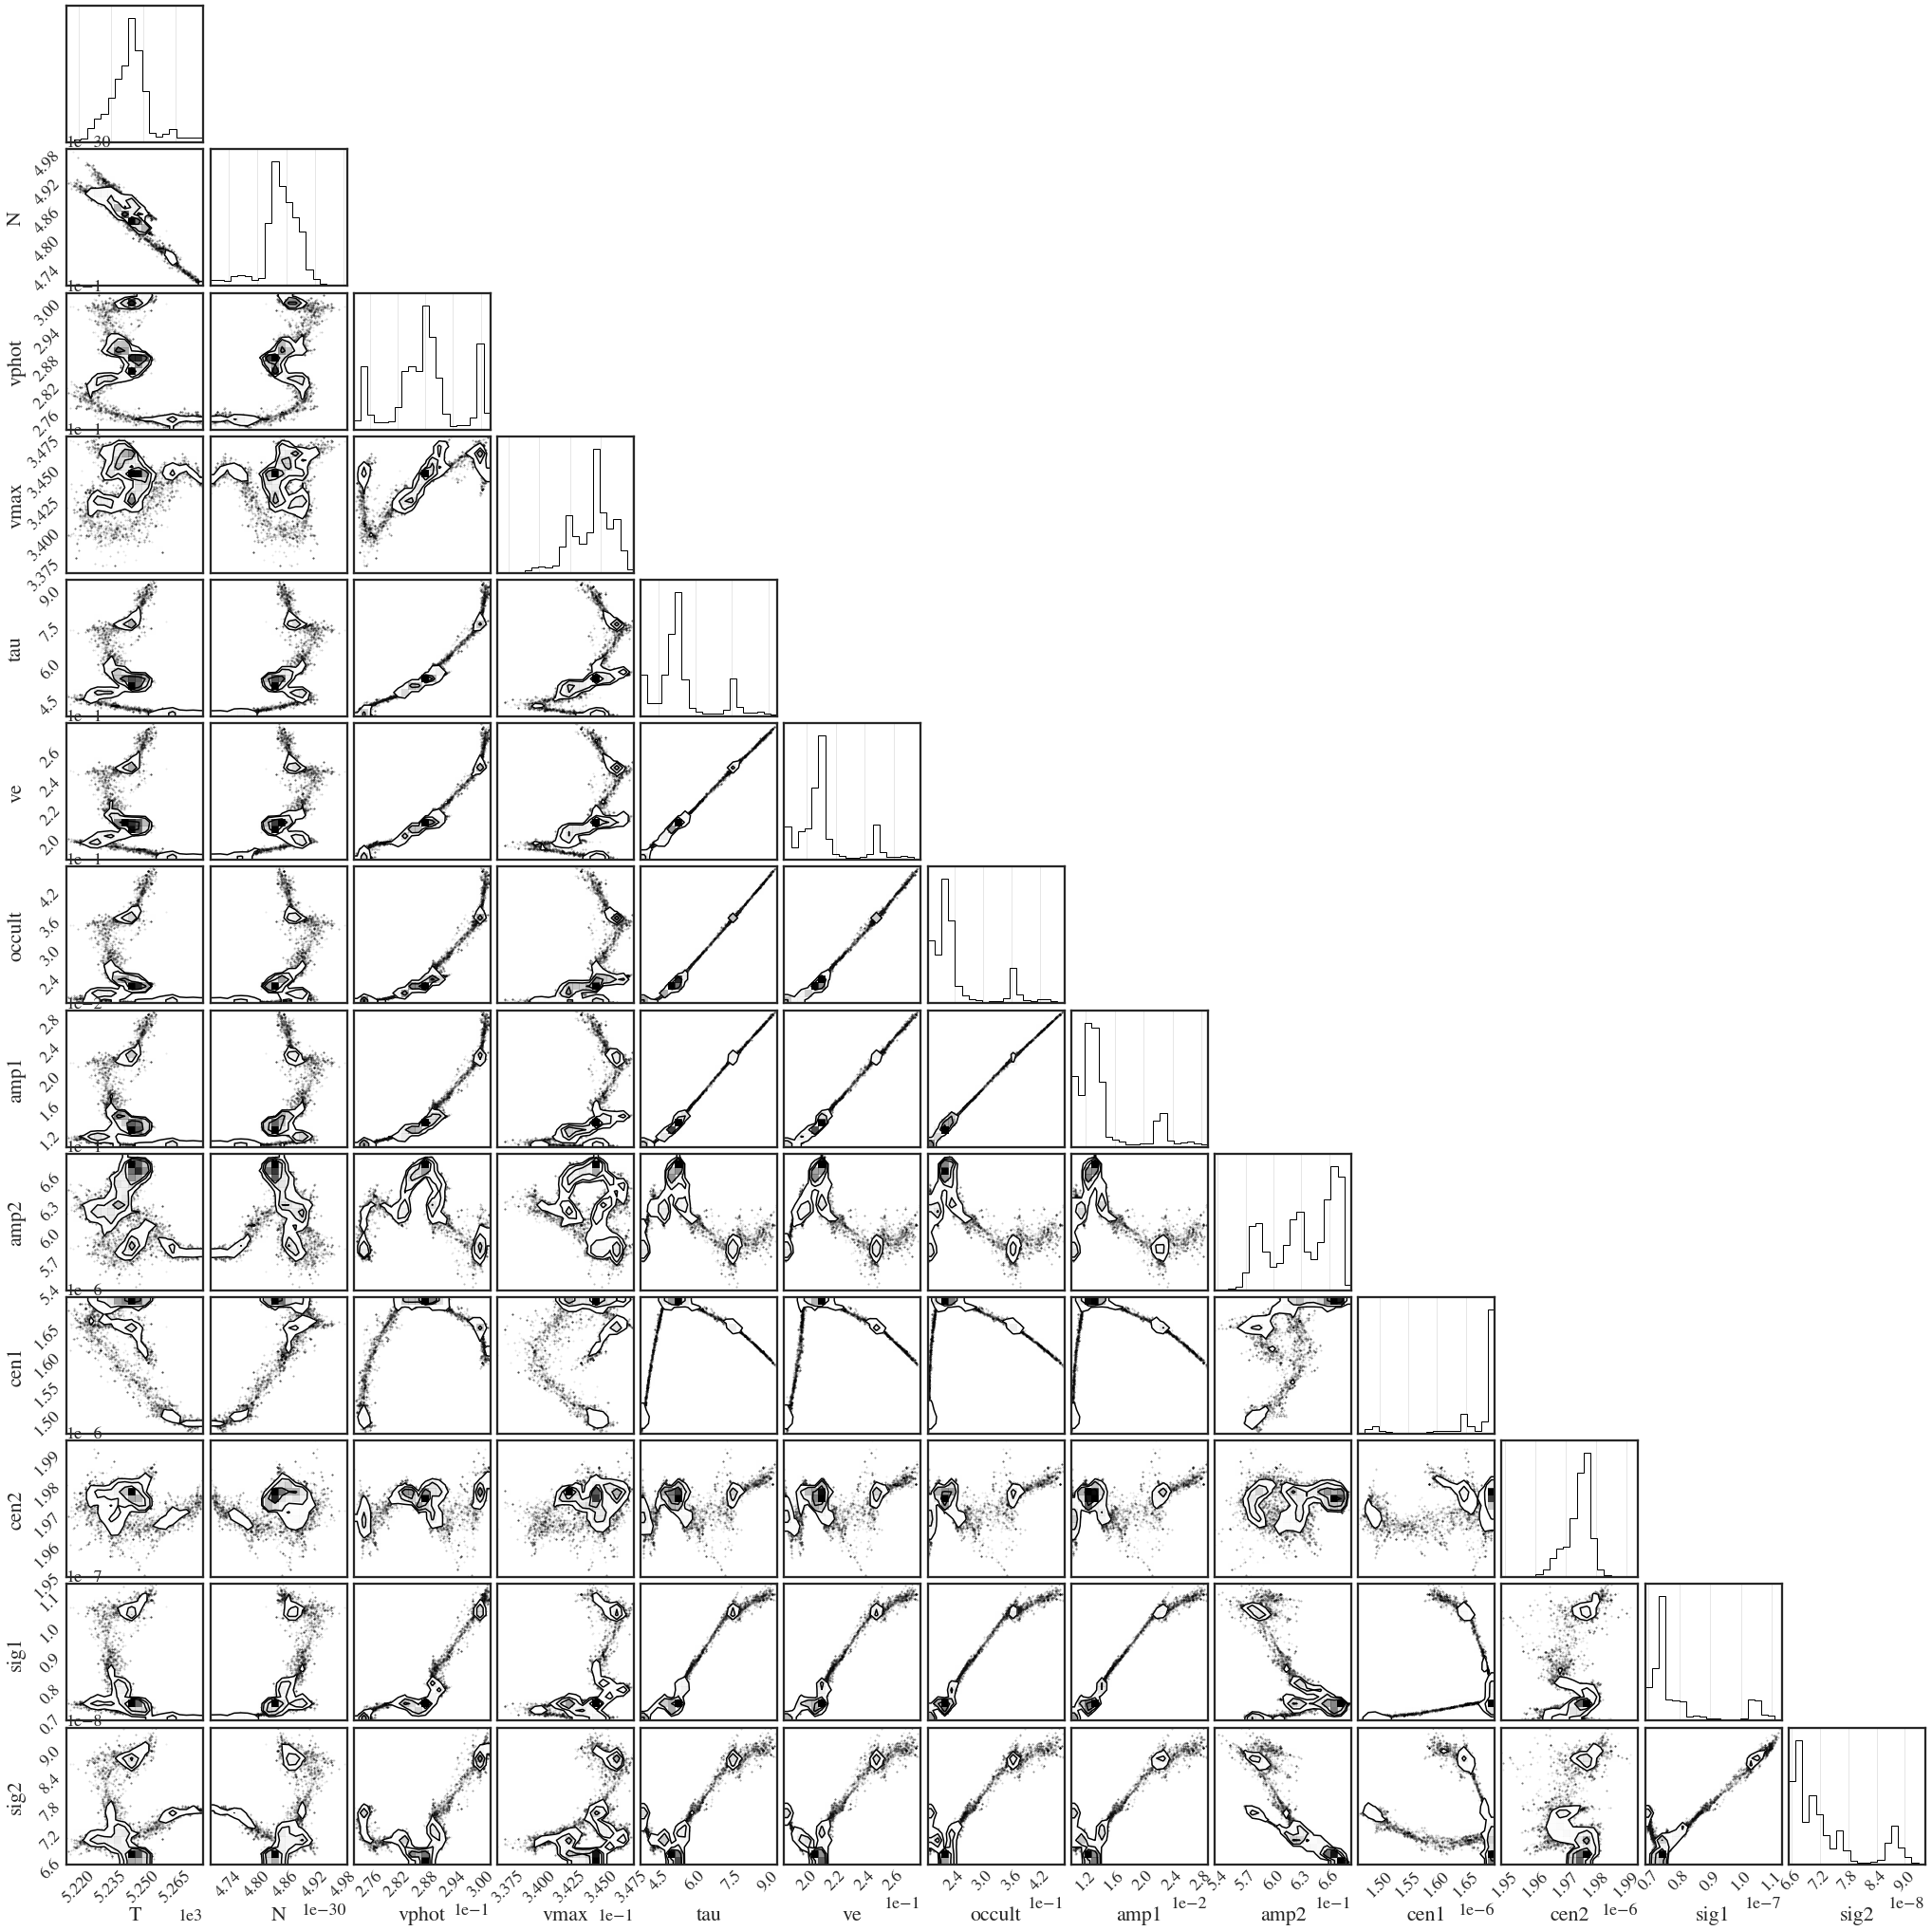

In [73]:
emcee_corner = corner.corner(emcee_res.flatchain, labels=emcee_res.var_names,
                             truths=list(emcee_res.params.valuesdict().values()))

In [75]:
dir(emcee_res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_statistics',
 '_repr_html_',
 'aborted',
 'acceptance_fraction',
 'aic',
 'bic',
 'call_kws',
 'chain',
 'chisqr',
 'errorbars',
 'flatchain',
 'init_vals',
 'init_values',
 'lnprob',
 'method',
 'ndata',
 'nfev',
 'nfree',
 'nvarys',
 'params',
 'redchi',
 'residual',
 'show_candidates',
 'var_names']

In [80]:
np.shape(emcee_res.chain)

(900, 30, 13)

In [92]:
emcee_res.chain[0,:,0]

array([5275.70626546, 5276.65545182, 5275.05370091, 5272.46181122,
       5276.39029026, 5269.37109804, 5268.64294083, 5276.59924695,
       5271.93875701, 5272.87631862, 5277.5533412 , 5274.5834263 ,
       5274.41448687, 5275.43339118, 5272.26635756, 5274.44453961,
       5276.22332763, 5275.35760111, 5276.03497717, 5274.01119549,
       5275.88834534, 5276.51569039, 5274.63362741, 5275.89335662,
       5275.12868792, 5277.34749097, 5268.14121194, 5276.80196003,
       5272.76594584, 5277.61273616])

In [91]:
emcee_res.chain[-1,:,0]

array([5251.40559222, 5251.395244  , 5250.30797093, 5251.37094154,
       5252.55964554, 5247.31159301, 5249.6375852 , 5255.29087494,
       5251.09430822, 5253.34290038, 5250.19483399, 5248.32828646,
       5253.90408282, 5249.37678089, 5250.28535868, 5249.03402164,
       5249.4664192 , 5249.8772084 , 5253.48892266, 5252.36440293,
       5251.67994971, 5251.26262821, 5246.85374736, 5251.63612599,
       5249.61857087, 5248.24931779, 5253.37405259, 5251.23152411,
       5252.2752464 , 5251.63974589])

(array([ 75.,  49.,  27., 112., 227., 166.,  77.,  13.,  20., 134.]),
 array([0.2737341 , 0.27648891, 0.27924371, 0.28199851, 0.28475331,
        0.28750812, 0.29026292, 0.29301772, 0.29577252, 0.29852733,
        0.30128213]),
 <BarContainer object of 10 artists>)

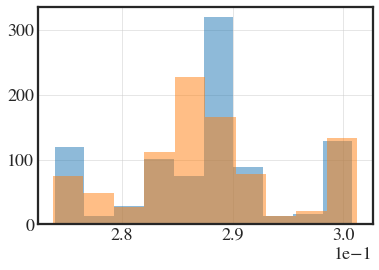

In [96]:
plt.hist(emcee_res.chain[:,0,2], alpha=0.5)
plt.hist(emcee_res.chain[:,1,2], alpha=0.5)

In [70]:
0.011/.0098

1.1224489795918366

In [114]:
0.0098*c*1e-3/40.6

72.41379310344827

In [ ]:
#files = ["./data/OB1_init_no_gaussian_low_v.pkl", "./data/OB2_init_no_gaussian_low_v.pkl", 
#        "./data/OB3_init_no_gaussian_high_v.pkl", "./Data/OB4/OB4_3.pkl"] #'OB4_pick.pkl'
#n_days = [1.43, 2.42, 3.65, 4., 5.40]
n_days = [1.435, 2.42, 3.42, 4.40, 5.40]

files = ["./data/OB1/OB1_3_peaks_XL_3.pkl", "./data/OB2/OB2_3_peaks_XL_2.pkl", 
        "./data/OB3/OB3_3_peaks_XL_4.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl", 
        "./Data/OB5/OB5_3_peaks_XL.pkl"] 
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
plt.figure(figsize=(8,5))

steady = [10000, 1000, 100000, 1000, 0, 0]

d_m, ds_1, ds_2 = [], [], []
multi = [1, 1, 1, 1, 1, 1]
#multi = [np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi)]

pdf_list = []
for idx, file in enumerate(files[:2]):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    vphot = np.array(emcee_flatten['vphot'])
    dl = lum_dist_arr(np.array(emcee_flatten['N']), vphot, n_days=n_days[idx])[steady[idx]:]*multi[idx]
                      #emcee_res.params['t0'].value/86400)#n_days[idx])
    
    h = plt.hist(dl, bins=250, histtype='step', density=True, label='Epoch '+str(idx+1), range=(38,42))
    pdf_list.append(h[0])
    #plt.hist(dl, bins=100, histtype='stepfilled', density=True, alpha=0.2)
    #, range=(35,50));
    d1, d_l, d_h = np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)
    d_m.append(d1); ds_1.append(d1-d_l), ds_2.append(d_h-d1)
    print('Lum_dist = ', d1, '+', d_h-d1, '-', d1-d_l)
    print(emcee_res.params['ve'])
    print(np.median(emcee_flatten['N']))

d_m = np.array(d_m); ds_1 = np.array(ds_1); ds_2 = np.array(ds_2)
    
plt.legend()
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 
plt.xlim(39, 41)

#plt.savefig('Pictures/dl_dist_3.png', dpi=300)